<img src="materials/images/introduction-to-visualization-cover.png"/>


# 👋 Welcome, before you start
<br>

### 📚 Module overview

We will go through two lessons with you:

- [**Lesson 1: Heatmap**](Lesson_1_Heatmap.ipynb)
- <font color=#E98300>**Lesson 2: Volcano Plot**</font>    `📍You are here.`
</br>



<div class="alert alert-block alert-info">
<h3>⌨️ Keyboard shortcut</h3>

These common shortcut could save your time going through this notebook:
- Run the current cell: **`Enter + Shift`**.
- Add a cell above the current cell: Press **`A`**.
- Add a cell below the current cell: Press **`B`**.
- Change a code cell to markdown cell: Select the cell, and then press **`M`**.
- Delete a cell: Press **`D`** twice.

Need more help with keyboard shortcut? Press **`H`** to look it up.
</div>

---

# Lesson 2: Volcano Plot

⏲ `This module should take about 20 minutes to complete.`

A **<mark>volcano plot</mark>** is a 2-dimensional scatter plot that has the shape of a volcano. It makes it easy to visualize the expression of thousands of genes obtained from -omics research (e.g., transcriptomics, genomics, proteomics, etc.) and to identify genes with significant changes. It is used to plot the log fold change in the observation between two conditions (e.g., the gene expression between comparison and control conditions) on the x-axis. On the y-axis is the corresponding p-value for each observation, representing the statistical significance of the change (if any) between the different conditions.

A volcano plot can visualize a lot of complex information in one plot. The wider the dispersion of data points in the volcano plot the greater the significance in gene expression changes between two conditions.

<img src="materials/images/images_volcano_plot/log2_plot.png"/>

In the volcano plot shown above, the x-axis displays the magnitude of the log<sub>2</sub>-fold change in gene expression between control and treatment conditions. On the y-axis is the level of statistical significance of the observed change. For example, the red points indicate genes that display both large-magnitude fold changes (x-axis) as well as high statistical significance (-log<sub>10</sub> p-value, y-axis). The dashed green line shows the p-vaule cutoff of 0.01 (10<sup>-2</sup>) with points above the line having a p-value < 0.01 and points below the line having a p-value > 0.01. The vertical dashed blue lines indicate log<sub>2</sub>-fold changes of ±2. **Therefore, all red dots exhibit log<sub>2</sub>-fold changes beyond ±2 (four-fold change) and statistical significance less than 0.01.**

<div class="alert alert-block alert-success">
<b>Reading a Volcano Plot</b>
    
To be clear, the <b>x-axis</b> of a Volcano plot represents the amount of change following a condition or experiment. The zero (0) point on the x-axis represents no change. For every point increment to the right of 0, the amount of the change doubles. For example, 1 on the x-axis represents an increase of twice the original (control) value, 2 on the x-axis represents an increase of 4 times the original value, and 3 on the x-axis represents an increase of 8 times the original value. Every point below 0 is interpreted similarly except that it represents a decrease in the original (control) value.
    
The <b>y-axis</b> of a Volcano plot represents the significance of the change on the x-axis in p-values (probability values). The zero (0) point on the y-axis represents a p-value of 1.0. For every point increase on the y-axis, the decimal point of the p-value moves one place to the left. For example, 2 on the y-axis is equivalent to a p-value of .01, which can be interpreted as there's appoxiamtely a 1% chance that you could get the value that you observed, assuming that there is no difference between the control and experimental conditions. In other words, it suggests that the observation appears to be significant. (A 3 on the y-axis would represent a p-value of .001, a 4 would represent a p-value of .0001, etc.)
</div>

---

# Example Volcano Plot of Gene Expression

The volcano plot enables the ability to quickly see the effect (if any) of an experiment (e.g., change in protein expression) between two conditions in terms of both an increase and decrease of the observed value along with the statistical significance of any observed change.

### ✅ `Run` each of the cells below:

### Sample data set
The sample data below shows **gene names**, **log<sub>2</sub>-fold changes**, and the **p-values** for the observed changes.

In [1]:
import pandas as pd
from bioinfokit import analys, visuz

df = pd.read_csv("data/data_volcano_plot/volcano_data.csv")

df.head()

,GeneNames,log2FC,p-value
0,LOC_Os09g01000.1,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,3.231611,1.050000e-55
2,LOC_Os12g42884.2,3.179004,2.590000e-54
3,LOC_Os03g16920.1,5.290677,4.690000e-54
4,LOC_Os05g47540.4,4.096862,2.190000e-54


### Sample Plot
The sample plot below indicates that the threshold of significance is a log<sub>2</sub>-fold change beyond ±1. So up-regulated genes have a log<sub>2</sub>-fold change threshold of 1, and down-regulated genes have a log<sub>2</sub>-fold change threshold of -1. The p-value threshold for significance is set to 0.05.

The gray points indicate non-significant points. The red points indicate significant up-regulated genes and the black points indicate significant down-regulated genes.

/opt/conda/lib/python3.10/site-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu S

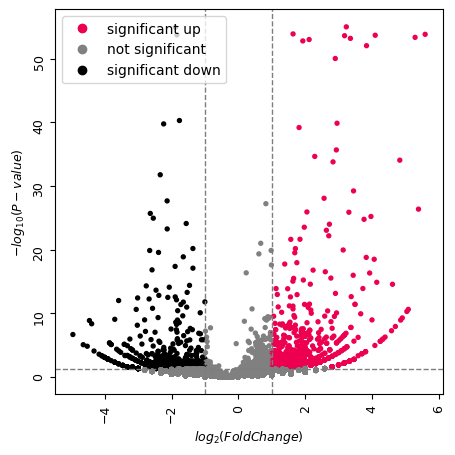

In [2]:
visuz.GeneExpression.volcano(df=df, lfc="log2FC", pv="p-value", show=True, plotlegend=True,
                                    sign_line=True, color=("#EC004F", "grey", "black"))

### Modify the thresholds
The sample plot below is displayed with a log<sub>2</sub>-fold threshold of -1 and a p-value threshold of < 0.05 for significantly down-regulted genes. And a log<sub>2</sub>-fold threshold of 2 and a p-value threshold of < 0.01 for significantly up-regulted genes.

The light gray points indicate non-significant points. The pink points indicate significant down-regulated genes (i.e., log<sub>2</sub>-fold < -1 and p-value < 0.05)  and the cardinal points indicate significant up-regulated genes (log<sub>2</sub>-fold > 2 and p-value < 0.01).

/opt/conda/lib/python3.10/site-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

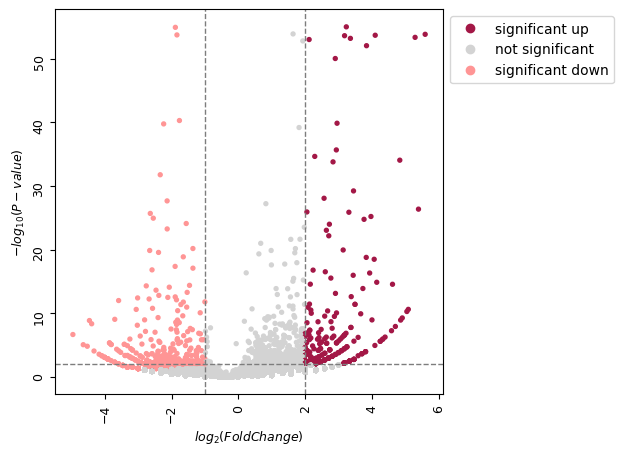

In [3]:
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 1), pv_thr=(0.01, 0.05),
    color=("#A31746", "lightgrey", "#FF9595"), show=True, plotlegend=True, legendpos='upper right',
    sign_line=True, legendanchor=(1.46,1))

## The plots can be customized

### Add gene labels

/opt/conda/lib/python3.10/site-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

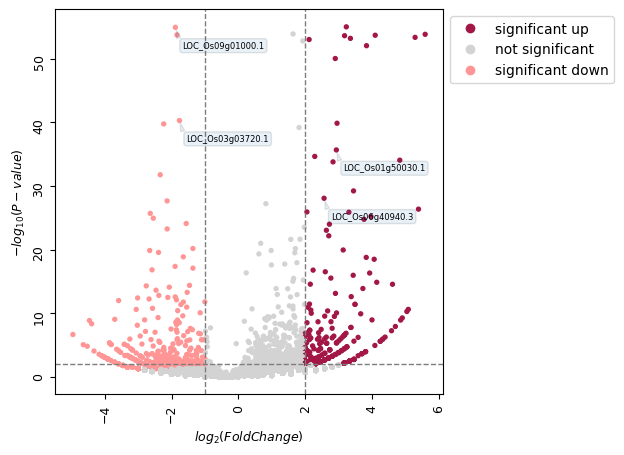

In [4]:
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 1), pv_thr=(0.01, 0.05),
    color=("#A31746", "lightgrey", "#FF9595"), show=True, plotlegend=True, legendpos='upper right',
    sign_line=True, legendanchor=(1.46,1), genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1"),
    gstyle=2, geneid="GeneNames")

### Add gene names

/opt/conda/lib/python3.10/site-packages/bioinfokit/visuz.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color_add_axy'].fillna(color[1], inplace=True)  # intermediate
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

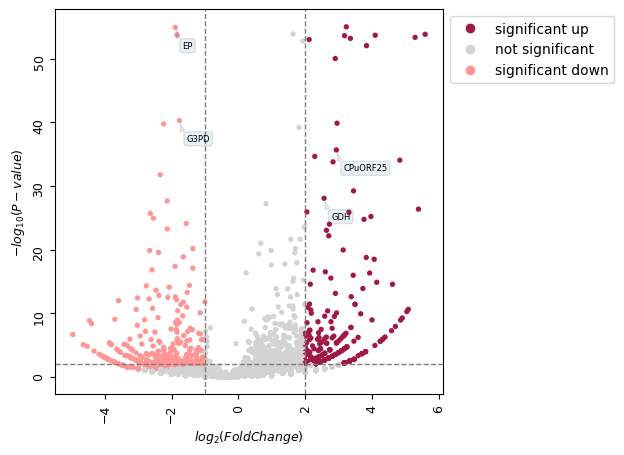

In [5]:
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 1), pv_thr=(0.01, 0.05),
    color=("#A31746", "lightgrey", "#FF9595"), show=True, plotlegend=True, legendpos='upper right',
    sign_line=True, legendanchor=(1.46,1),
    genenames=({"LOC_Os09g01000.1":"EP", "LOC_Os01g50030.1":"CPuORF25", "LOC_Os06g40940.3":"GDH", "LOC_Os03g03720.1":"G3PD"}),
    gstyle=2, geneid="GeneNames")

---

# 🌟 You are done!
<br>
Review previous lessons often to consolidate the learnings.

    
- [**Lesson 1: Heatmap**](Lesson_1_Heatmap.ipynb)

- [**Lesson 2: Volcano Plot**](Lesson_2_Volcano_Plot.ipynb)

---

# Contributions & acknowledgment

Thanks Antony Ross for contributing the content for this notebook.

---

Copyright (c) 2022 Stanford Data Ocean (SDO)

All rights reserved.